# Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [2]:
! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-19 17:04:32--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv.1'

housing.csv.1       100%[===================>]   1.36M  4.27MB/s    in 0.3s    

2023-10-19 17:04:33 (4.27 MB/s) - 'housing.csv.1' saved [1423529/1423529]



### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2 we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log tranform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')
#Look at the initial data
display(df.head())

# Only keep entries where 'ocean_proximity' is '<1H OCEAN' or 'INLAND'
idx = df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])
df_t = df[idx]

## 1 - fill missing values with zeros
df_temp = df_t.copy()
df_temp = df_temp.fillna(0)
display(df_temp.isna().sum())

## 2 - Apply log transform to median_house_value and set as Y
y = np.log(df_temp['median_house_value'])

## 3 - Drop Y from data frame to create X
X = df_temp
X = X.drop(columns =['median_house_value'])
display(X.columns)
print(X.shape, len(y))

## 4 - train_test_split (60/20/20)
rs = 1
X_train, X_full_test, y_train, y_full_test = train_test_split(X, y, random_state=rs, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_full_test, y_full_test, random_state=rs, test_size=0.5)

## 5 - Turn the dataframes into matrices with the DictVectorizer
# Fit the dict vectoriser to the full dataset (I do this just in case the test and validation sets don't include some values)
dv = DictVectorizer(sparse=False) #instantiate
X_dict = X.to_dict(orient='records')
dv.fit(X_dict)

# Transform the train, test, and validation sets
X_train_dict = X_train.to_dict(orient='records')
X_train_dv = dv.transform(X_train_dict)

X_test_dict = X_test.to_dict(orient='records')
X_test_dv = dv.transform(X_test_dict)

X_val_dict = X_val.to_dict(orient='records')
X_val_dv = dv.transform(X_val_dict)

## 6 - To make sure, confirm data sizes
print("Train Data Shape: ", X_train_dv.shape)
print("Test Data Shape: ", X_test_dv.shape)
print("Validation Data Shape: ", X_val_dv.shape)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

(15687, 9) 15687
Train Data Shape:  (9412, 10)
Test Data Shape:  (3138, 10)
Validation Data Shape:  (3137, 10)


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`

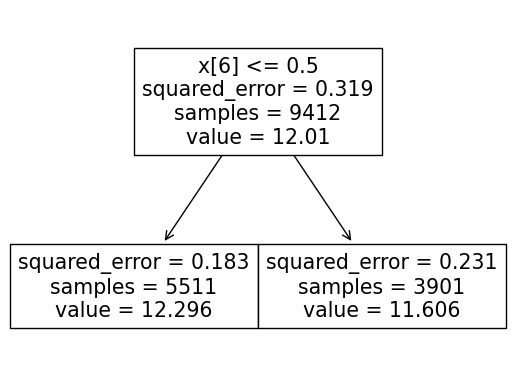

|--- feature_6 <= 0.50
|   |--- value: [12.30]
|--- feature_6 >  0.50
|   |--- value: [11.61]



In [78]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text

model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train_dv,y_train)

plot_tree(model)
plt.show()

print(export_text(model))


It's the 6th (7th b/c 0 indexing) column which is printed below

In [79]:
print(dv.feature_names_[6])

ocean_proximity=INLAND


## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=10, random_state=rs, n_jobs=-1)
model.fit(X_train_dv,y_train)

y_pred = model.predict(X_val_dv)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(rmse)

0.2351471994690929


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 25
- 50
- 160

10 0.23514719946909288
20 0.22701861896807574
30 0.22374943911081738
40 0.22334693173820822
50 0.22174434067095117
60 0.22169667568073204
70 0.22136265786052667
80 0.220910171721745
90 0.22140293498508673
100 0.221109979243279
110 0.22064119936026563
120 0.22061171794388446
130 0.22043248735958051
140 0.22030673717592272
150 0.22018798795663225
160 0.2201925570434927
170 0.22009326804999899
180 0.22030582383179564
190 0.22031468624180928
200 0.2202178689798066


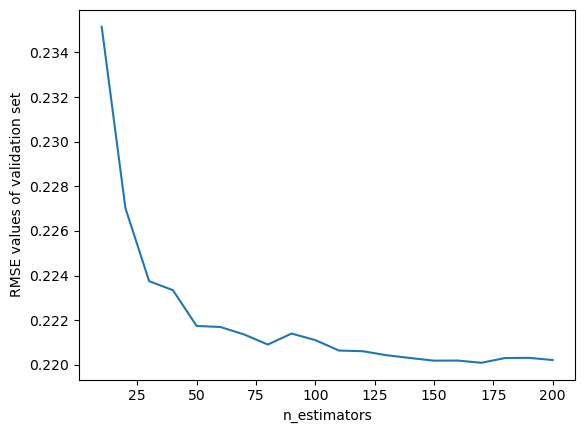

In [81]:
EstimatorValues = range(10,210,10)
RMSEvals = np.zeros(len(EstimatorValues))
c = 0
for n in EstimatorValues:
    model = RandomForestRegressor(n_estimators=n, random_state=rs, n_jobs=-1)
    model.fit(X_train_dv,y_train)

    y_pred = model.predict(X_val_dv)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(n,rmse)
    RMSEvals[c] = rmse
    c += 1

plt.plot(EstimatorValues,RMSEvals)
plt.xlabel('n_estimators')
plt.ylabel('RMSE values of validation set')
plt.show()


Personally, I would say it starts to plateau at around 125-150, but that isn't one of the answers. Closest is 160

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25

In [84]:
Depths = [10, 15, 20, 25]
GridSearchDict = {'max_depth':[], 'n_estimators':[],'rmse':[]}
for d in Depths:
    for ev in EstimatorValues:
        model = RandomForestRegressor(n_estimators=ev, max_depth=d, random_state=rs, n_jobs=-1)
        model.fit(X_train_dv,y_train)

        y_pred = model.predict(X_val_dv)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        #Update dictionary
        GridSearchDict['max_depth'].append(d)
        GridSearchDict['n_estimators'].append(ev)
        GridSearchDict['rmse'].append(rmse)

GridSearch_df = pd.DataFrame(GridSearchDict)

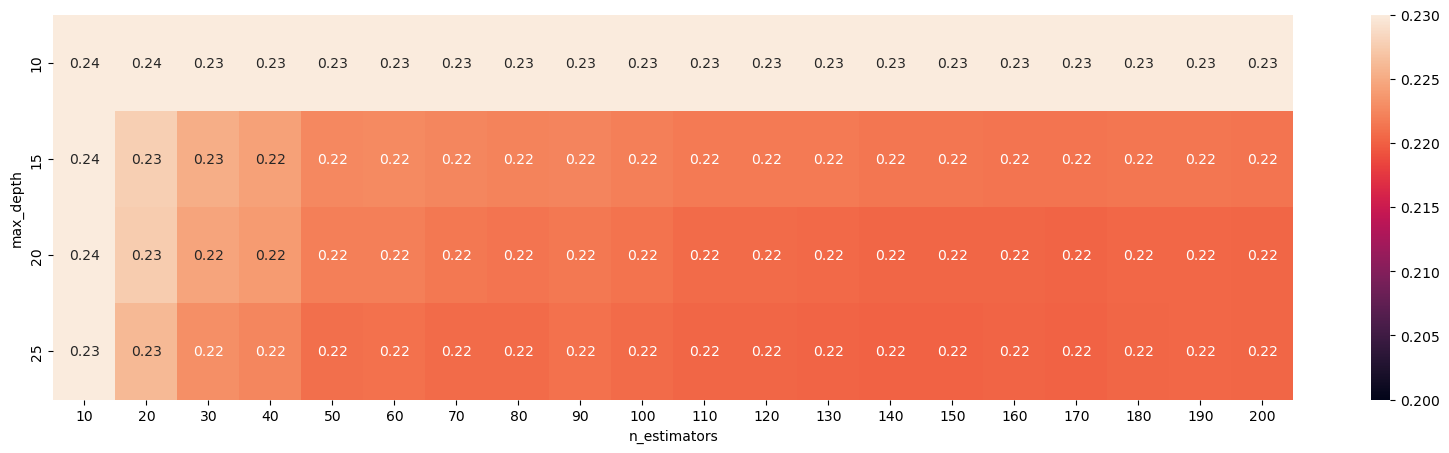

In [105]:
import seaborn as sns
fsz = (20,5)
fig, ax = plt.subplots(figsize=fsz)

GridSearch = GridSearch_df.pivot(index='max_depth', columns='n_estimators', values='rmse')
fig = sns.heatmap(data=GridSearch, vmin=0.2, vmax=0.23, annot=True, ax=ax)


In [114]:
idx = GridSearch_df['rmse'].argmin()
print("Look at row:",idx)
display(GridSearch_df.tail(10))

Look at row: 74


,max_depth,n_estimators,rmse
70,25,110,0.220282
71,25,120,0.220321
72,25,130,0.220258
73,25,140,0.220138
74,25,150,0.220099
75,25,160,0.220174
76,25,170,0.220132
77,25,180,0.220375
78,25,190,0.220424
79,25,200,0.220307


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`

In [127]:
model = RandomForestRegressor(n_estimators=10, 
                              max_depth=20, 
                              random_state=rs, 
                              n_jobs=-1)
model.fit(X_train_dv,y_train)
tdf = pd.DataFrame({'feature_name': dv.feature_names_, 'feature_importance': model.feature_importances_})
display(tdf.sort_values(by='feature_importance', ascending=False))

,feature_name,feature_importance
4,median_income,0.338282
6,ocean_proximity=INLAND,0.285802
2,latitude,0.096416
3,longitude,0.084878
5,ocean_proximity=<1H OCEAN,0.073620
1,housing_median_age,0.032821
7,population,0.028630
9,total_rooms,0.024300
0,households,0.018163
8,total_bedrooms,0.017087


median_income is the most important

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [148]:
#Fix the features names for XGBOOST
features = dv.get_feature_names_out()
print(features)
features[5] = features[5].replace("=<"," less than or equal to ")
print(features)

['households' 'housing_median_age' 'latitude' 'longitude' 'median_income'
 'ocean_proximity=<1H OCEAN' 'ocean_proximity=INLAND' 'population'
 'total_bedrooms' 'total_rooms']
['households' 'housing_median_age' 'latitude' 'longitude' 'median_income'
 'ocean_proximity less than or equal to 1H OCEAN' 'ocean_proximity=INLAND'
 'population' 'total_bedrooms' 'total_rooms']


In [179]:
import xgboost as xgb
def parse_output_to_dataframe(output):
    s = output.stdout
    cols = ['n_iter','train_rmse','val_rmse']
    results = []
    #Begin to parse the output
    lines = s.split("\n")
    for line in lines:
        if "[" in line:
            n_iter, train_rmse, val_rmse = line.split("\t")

            n_iter = int(n_iter.strip("[]"))
            train_rmse = float(train_rmse.strip("Train-rmse:"))
            val_rmse = float(val_rmse.strip("Val-rmse:"))

            results.append((n_iter, train_rmse, val_rmse))
    
    #to dataframe
    df = pd.DataFrame(results,columns=cols)
    return df

In [203]:
%%capture output

#DMatrices
dTrain = xgb.DMatrix(X_train_dv, 
                     label= y_train,
                     feature_names = features) 
dVal = xgb.DMatrix(X_val_dv, 
                     label= y_val,
                     feature_names = features)

#Create watchlist
watchlist = [(dTrain,'Train'), (dVal,'Val')]
#Establish parameters
xgb_params = {'eta': 0.3,
              'max_depth': 6,
              'min_child_weight': 1,

              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity':1}

#Fit, predict and evaluate model
model1 = xgb.train(xgb_params, dTrain, num_boost_round=100,
                    evals=watchlist,
                    verbose_eval=5)

In [204]:
eta03_iterations = parse_output_to_dataframe(output)
display(eta03_iterations)   


,n_iter,train_rmse,val_rmse
0,0,8.07259,8.07285
1,5,1.38938,1.38891
2,10,0.32689,0.33597
3,15,0.21283,0.23796
4,20,0.19627,0.22953
5,25,0.18289,0.22342
6,30,0.17403,0.22113
7,35,0.16707,0.22009
8,40,0.16130,0.21843
9,45,0.15524,0.21836


In [213]:
%%capture output_2
# Now at eta = 0.1

#Establish parameters
xgb_params = {'eta': 0.1,
              'max_depth': 6,
              'min_child_weight': 1,

              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity':1}

#Fit, predict and evaluate model
model2 = xgb.train(xgb_params, dTrain, num_boost_round=100,
                    evals=watchlist,
                    verbose_eval=5)

In [214]:
eta01_iterations = parse_output_to_dataframe(output_2)
display(eta01_iterations)   

,n_iter,train_rmse,val_rmse
0,0,10.37326,10.37375
1,5,6.13352,6.13358
2,10,3.63247,3.63195
3,15,2.15887,2.15787
4,20,1.29380,1.29335
5,25,0.79023,0.79095
6,30,0.50333,0.50832
7,35,0.34685,0.35739
8,40,0.26677,0.28331
9,45,0.22874,0.25094


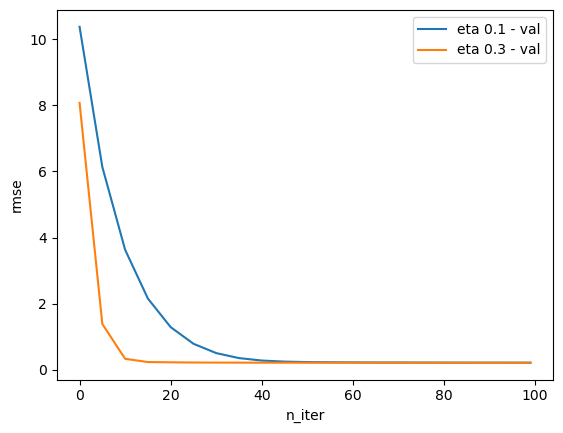

In [215]:
plt.plot(eta01_iterations['n_iter'],eta01_iterations['val_rmse'], label='eta 0.1 - val')
plt.plot(eta03_iterations['n_iter'],eta03_iterations['val_rmse'], label='eta 0.3 - val')
plt.legend()
plt.xlabel('n_iter')
plt.ylabel('rmse')
plt.show()

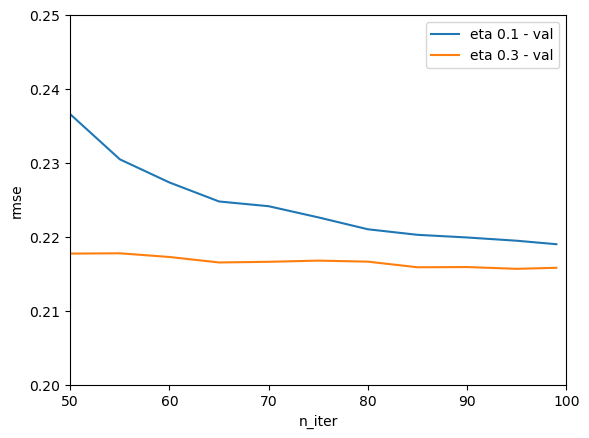

In [216]:
plt.plot(eta01_iterations['n_iter'],eta01_iterations['val_rmse'], label='eta 0.1 - val')
plt.plot(eta03_iterations['n_iter'],eta03_iterations['val_rmse'], label='eta 0.3 - val')
plt.legend()
plt.xlabel('n_iter')
plt.ylabel('rmse')
plt.xlim(50,100)
plt.ylim(0.2,0.25)
plt.show()

They are pretty much the same towards the end, obviously if you slow down the number of iterations you will need more iterations to produce a more accurate prediction. My guess is they may begin to approximate toward each other when you go past 100 iterations, with eta = 0.1 having the lower RMSE value

## Submit the results

- Submit your results here: https://forms.gle/Qa2SuzG7QGZNCaoV9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used